In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
# Load the dataset
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# Perform data cleaning
df.drop('Serial No.', axis=1, inplace=True)  # Remove unnecessary column

In [5]:
# Check for missing values
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


#### Data has no missing values

In [6]:
# Descriptive statistics
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


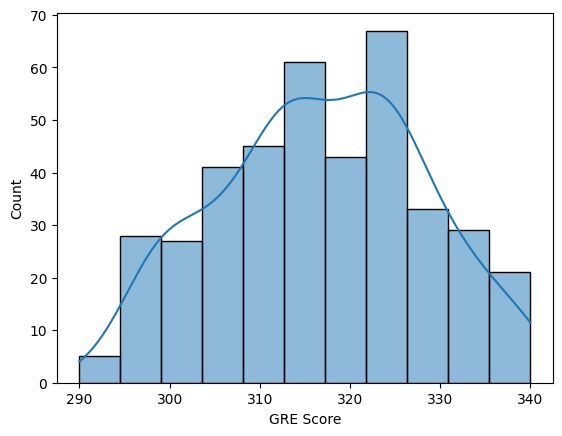

In [7]:
# Data visualization
sns.histplot(df['GRE Score'], kde=True)
plt.xlabel('GRE Score')
plt.show()

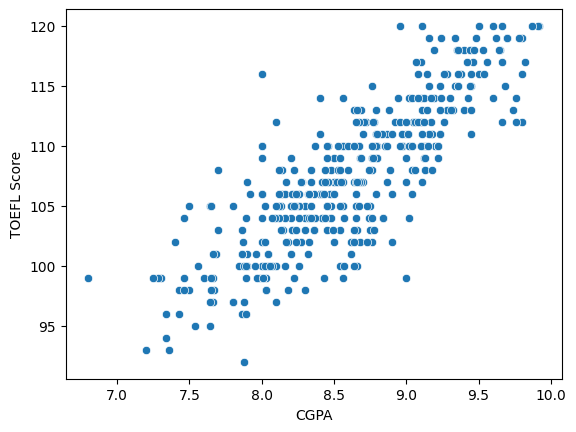

In [8]:
sns.scatterplot(x='CGPA', y='TOEFL Score', data=df)
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

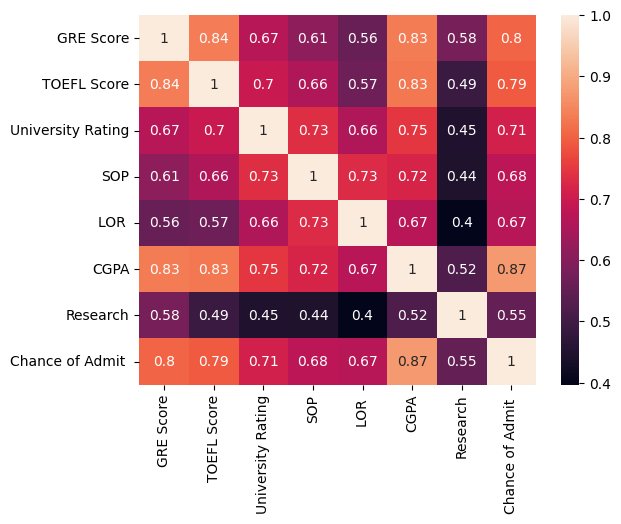

In [9]:
# Correlation analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
print(df.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [11]:
# Remove the trailing whitespace from the column name
df.rename(columns={'LOR ': 'LOR'}, inplace=True)


In [12]:
df['Cumulative Rating'] = df['SOP'] + df['LOR'] + df['University Rating']


In [13]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']


In [14]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### SVR Model

In [16]:
# Model Building
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

In [17]:
# Predictions on the test set
y_pred = regressor.predict(X_test)

In [18]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.006276349061161822
R-squared: 0.7569507138858915


### RandomForestRegressor

In [19]:
# Model Building
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# Predictions on the test set
y_pred = regressor.predict(X_test)

In [21]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.005002298249999998
R-squared: 0.8062878583162654
